In [1]:
import causallearn

In [2]:
# Get Data
import numpy as np

# Define the correlation matrix
correlation_matrix = np.array([[1.0, 0.8, 0.5, 0.3, -0.2],
                              [0.8, 1.0, 0.7, 0.2, -0.4],
                              [0.5, 0.7, 1.0, 0.4, -0.1],
                              [0.3, 0.2, 0.4, 1.0, -0.3],
                              [-0.2, -0.4, -0.1, -0.3, 1.0]])

# Generate the correlated random variables
data = np.random.multivariate_normal(mean=[0, 0, 0, 0, 0], cov=correlation_matrix, size=1000)



In [54]:
import numpy as np

def generate_gaussian_variables(n, num_samples = 1000):
    # Initialize variables
    variables = np.zeros((num_samples, n))

    # Define influence relationships
    influences = {
        1: [],
        2: [],
        3: [1],
        4: [2, 3],
        5: [1, 4],
        6: [1, 4, 5],
        7: [1, 2, 6]
    }

    # Generate variables
    for i in range(1, n+1):
        variables[:,i-1] = np.random.normal(size = num_samples) + sum(variables[:,j-1] for j in influences[i]) 

    return variables

# Test the program
data = generate_gaussian_variables(7)
print("Generated variables:", data)
print(data.shape)


Generated variables: [[-1.55983983 -2.26856295  0.45368477 ... -2.14549952 -4.39911147
  -7.03539596]
 [ 0.56024773 -0.00747136  0.41954639 ... -0.86592919 -0.59831637
   0.506298  ]
 [ 0.12149361 -0.31154415 -0.16388136 ... -0.8730201  -1.41190019
  -2.28407741]
 ...
 [-0.49400857 -0.97916071  1.2317872  ...  2.30545194  2.49510376
  -0.39455126]
 [-0.33261822  0.78603691 -0.12064822 ...  1.27860727  1.76766612
   1.65351859]
 [-0.42324127  0.18861001  0.91542427 ...  2.20132266  6.36454909
   5.46057698]]
(1000, 7)


Depth=3, working on node 6: 100%|██████████| 7/7 [00:00<00:00, 875.45it/s] 


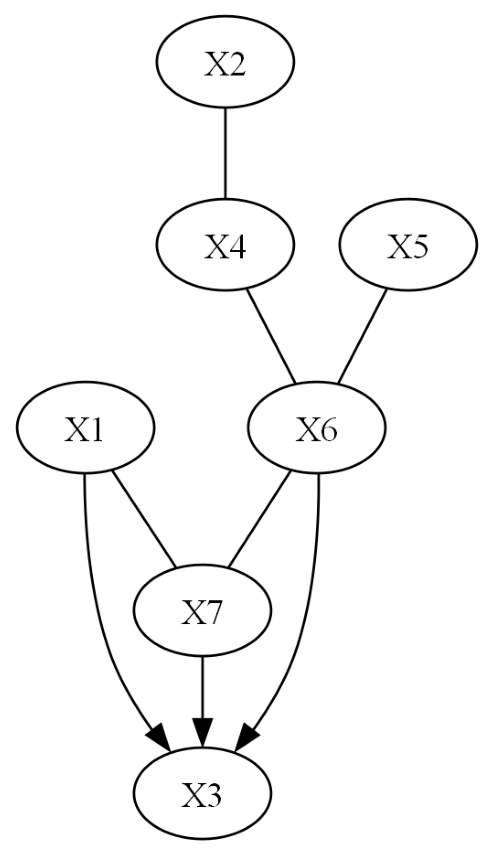

Green: undirected; Blue: directed; Red: bi-directed



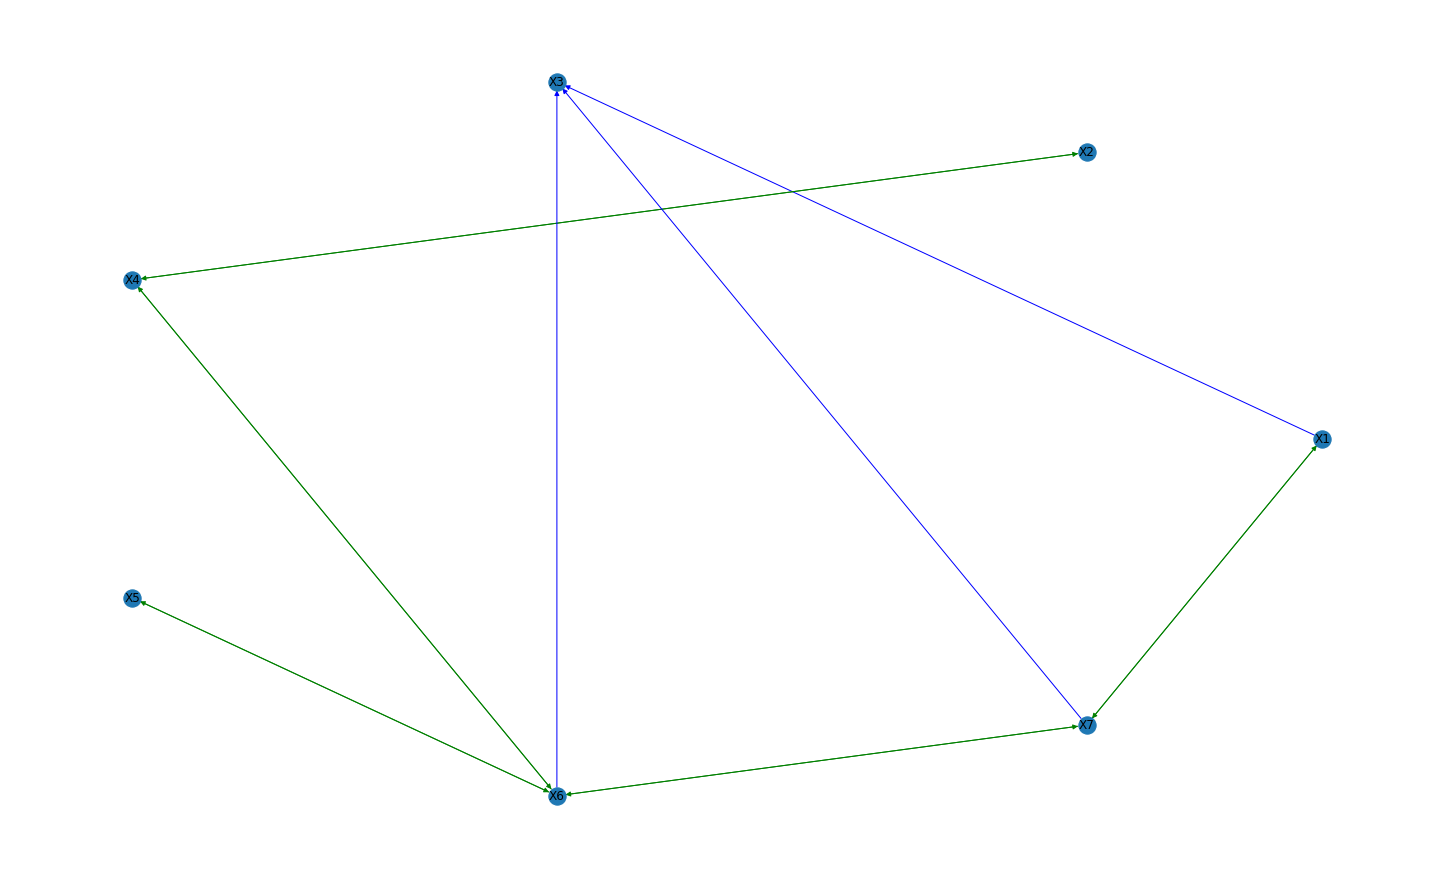

In [58]:
from causallearn.search.ConstraintBased.PC import pc
import pydot

import networkx as nx

# default parameters
bk = None
cg = pc(data, backgground_knowledge = bk)

# # or customized parameters
# cg = pc(data, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

# # visualization using networkx
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)